# WorldWide CF Machine learning data

This makes Fig  for the paper

a. PRJNA516442 (n = 93); b. PRJNA316588 (n = 18); c. PRJNA1126024 (n = 2); d. PRJNA931830 (n = 260); e. PRJEB32062 (n = 27); f. PRJNA644285 (n = 12); g. PRJEB51171 (n = 64); h. PRJNA1081394 (n = 549); i. PRJNA1055940 (n = 61); j. PRJEB14440 (n = 5); k. PRJNA510441 (n = 14); 


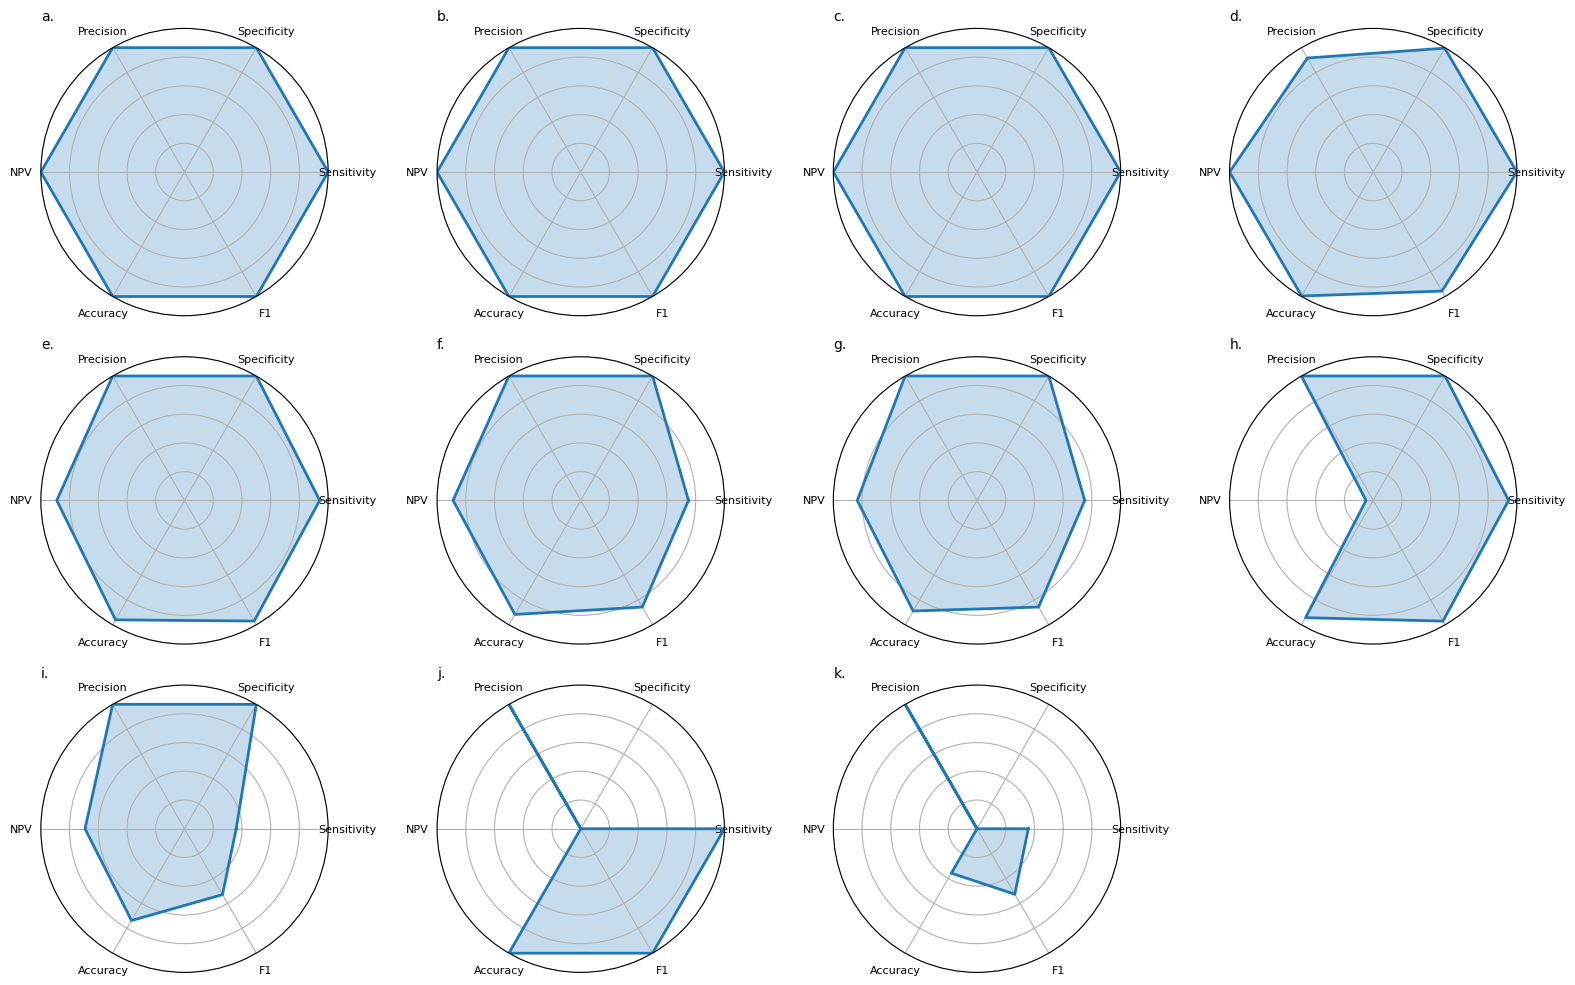

In [10]:
import math
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# ---------------------------------------------------------------------
# 1. Load data
# ---------------------------------------------------------------------
# Read the Excel file
path = "../WorldWideAnalysis/Worldwide CF Bioproject Summary.xlsx"

# Load the sheet named "WorldWideCF" into a DataFrame
df = pd.read_excel(path, sheet_name="WorldwideCF")


# ---------------------------------------------------------------------
# 2. Compute metrics from TP, TN, FP, FN
# ---------------------------------------------------------------------
# Avoid division-by-zero with a small epsilon
eps = 1e-9

df["Sensitivity"] = df["TP"] / (df["TP"] + df["FN"] + eps)
df["Specificity"] = df["TN"] / (df["TN"] + df["FP"] + eps)
df["Precision"]   = df["TP"] / (df["TP"] + df["FP"] + eps)
df["NPV"]         = df["TN"] / (df["TN"] + df["FN"] + eps)
df["Accuracy"]    = (df["TP"] + df["TN"]) / (df["TP"] + df["TN"] + df["FP"] + df["FN"] + eps)
df["F1"]          = 2 * (df["Precision"] * df["Sensitivity"]) / (
    df["Precision"] + df["Sensitivity"] + eps
)
df['sumall'] = df["Sensitivity"] + df["Specificity"] + df["Precision"] + df["NPV"] + df["Accuracy"] + df["F1"]

metrics = ["Sensitivity", "Specificity", "Precision", "NPV", "Accuracy", "F1"]
N = len(metrics)

# ---------------------------------------------------------------------
# 3. Prepare angles for radar / petal plots
# ---------------------------------------------------------------------
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # repeat first angle at the end to close the shape

# ---------------------------------------------------------------------
# 4. Layout for the grid of flowers
# ---------------------------------------------------------------------
n_items = len(df)
cols = 4                            # number of plots per row
rows = math.ceil(n_items / cols)    # number of rows needed

fig = plt.figure(figsize=(16, 10))

lett = 97
for idx, (_, row) in enumerate(df.sort_values(by='sumall', ascending=False).iterrows()):
    ax = plt.subplot(rows, cols, idx + 1, polar=True)

    # Values for this BioProject in metric order
    values = row[metrics].tolist()
    values += values[:1]  # close loop

    # Petal/flower outline and fill
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

    # Axes & labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, fontsize=8)
    ax.set_ylim(0, 1)
    ax.set_yticklabels([])   # optional: hide radial tick labels

    # Title with BioProject ID
    ax.set_title(f"{chr(lett)}.", fontsize=10, loc='left')
    print(f"{chr(lett)}. {row['Bioproject']} (n = {row['Number of Runs']}); ", end="")
    lett += 1
print()

plt.tight_layout()

# ---------------------------------------------------------------------
# 5. Save figure
# ---------------------------------------------------------------------
plt.savefig("final_images/fig5.png", dpi=300)
plt.savefig("final_images/fig5.svg")
plt.show()
plt.close()

# Create a thumbnail image for the markdown
imagefile = "fig5.png"
im = Image.open(os.path.join("final_images", imagefile))
thumb = im.copy()
thumb.thumbnail((150, 150))   # (width, height)

# Save the thumbnail
thumb.save(os.path.join("thumbnail_images", imagefile))


In [2]:
df

,Bioproject,Number of Runs,Number of bp,Runs analysed,Runs Correctly Predicted,Number of positive runs,TP,FN,TN,FP,...,Negative runs,Total runs,Outcome,Sensitivity,Specificity,Precision,NPV,Accuracy,F1,sumall
0,PRJEB14440,5,1330576074,5,5,5,5,0,0,0,...,0,5,Success,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,4.000000
1,PRJEB32062,27,113773728053,25,24,6,16,1,8,0,...,8,25,Success,0.941176,1.000000,1.000000,0.888889,0.960000,0.969697,5.759762
2,PRJEB51171,64,29874922519,9,8,9,3,1,5,0,...,5,9,Success,0.750000,1.000000,1.000000,0.833333,0.888889,0.857143,5.329365
3,PRJNA1055940,61,386942064540,61,45,25,9,16,36,0,...,36,61,Success,0.360000,1.000000,1.000000,0.692308,0.737705,0.529412,4.319424
4,PRJNA1081394,549,510156291748,330,311,329,310,19,1,0,...,1,330,Success,0.942249,1.000000,1.000000,0.050000,0.942424,0.970266,4.904940
5,PRJNA1126024,2,1071033642,2,2,1,1,0,1,0,...,1,2,Success,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000
6,PRJNA316588,18,121257187412,17,17,2,2,0,15,0,...,15,17,Success,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000
7,PRJNA510441,14,906511907,14,5,14,5,9,0,0,...,0,14,Success,0.357143,0.000000,1.000000,0.000000,0.357143,0.526316,2.240602
8,PRJNA516442,93,34371719753,15,15,8,8,0,7,0,...,7,15,Success,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000
9,PRJNA644285,12,29679938510,12,11,4,3,1,8,0,...,8,12,Success,0.750000,1.000000,1.000000,0.888889,0.916667,0.857143,5.412698


In [3]:
for c in df.columns:
    print(f"'{c}', ", end="")

'Bioproject', 'Number of Runs', 'Number of bp', 'Runs analysed', 'Runs Correctly Predicted', 'Number of positive runs', 'TP', 'FN', 'TN', 'FP', 'Positive runs', 'Negative runs', 'Total runs', 'Outcome', 'Sensitivity', 'Specificity', 'Precision', 'NPV', 'Accuracy', 'F1', 'sumall', 

In [4]:
df[['Bioproject', 'TP', 'FN', 'TN', 'FP', 'Sensitivity', 'Specificity', 'Precision', 'NPV', 'Accuracy', 'F1', 'sumall']].sort_values(by='sumall')

,Bioproject,TP,FN,TN,FP,Sensitivity,Specificity,Precision,NPV,Accuracy,F1,sumall
7,PRJNA510441,5,9,0,0,0.357143,0.000000,1.000000,0.000000,0.357143,0.526316,2.240602
0,PRJEB14440,5,0,0,0,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,4.000000
3,PRJNA1055940,9,16,36,0,0.360000,1.000000,1.000000,0.692308,0.737705,0.529412,4.319424
4,PRJNA1081394,310,19,1,0,0.942249,1.000000,1.000000,0.050000,0.942424,0.970266,4.904940
2,PRJEB51171,3,1,5,0,0.750000,1.000000,1.000000,0.833333,0.888889,0.857143,5.329365
9,PRJNA644285,3,1,8,0,0.750000,1.000000,1.000000,0.888889,0.916667,0.857143,5.412698
1,PRJEB32062,16,1,8,0,0.941176,1.000000,1.000000,0.888889,0.960000,0.969697,5.759762
10,PRJNA931830,11,0,248,1,1.000000,0.995984,0.916667,1.000000,0.996154,0.956522,5.865326
5,PRJNA1126024,1,0,1,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000
6,PRJNA316588,2,0,15,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000
